In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.model_selection import cross_val_score

In [5]:
df= pd.read_csv("/content/heart_cleveland_dataset.csv")

In [6]:
df.shape

(297, 14)

In [7]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [8]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0
296,35,1,3,126,282,0,2,156,1,0.0,0,0,2,1


In [9]:
df["condition"].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

<Axes: xlabel='condition'>

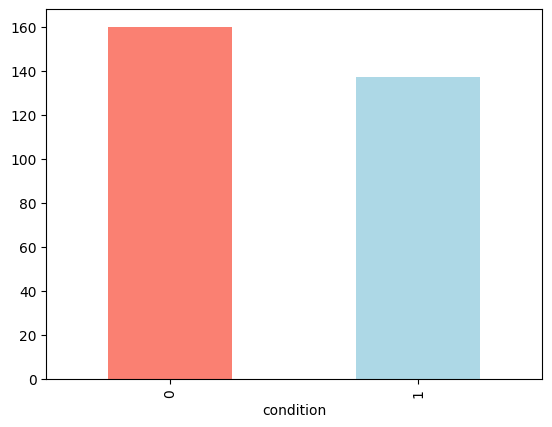

In [10]:
df["condition"].value_counts().plot(kind="bar",color=["salmon","lightblue"])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [12]:
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [14]:
df.sex.value_counts()

sex
1    201
0     96
Name: count, dtype: int64

In [15]:
pd.crosstab(df.condition,df.sex)

sex,0,1
condition,,
0,71,89
1,25,112


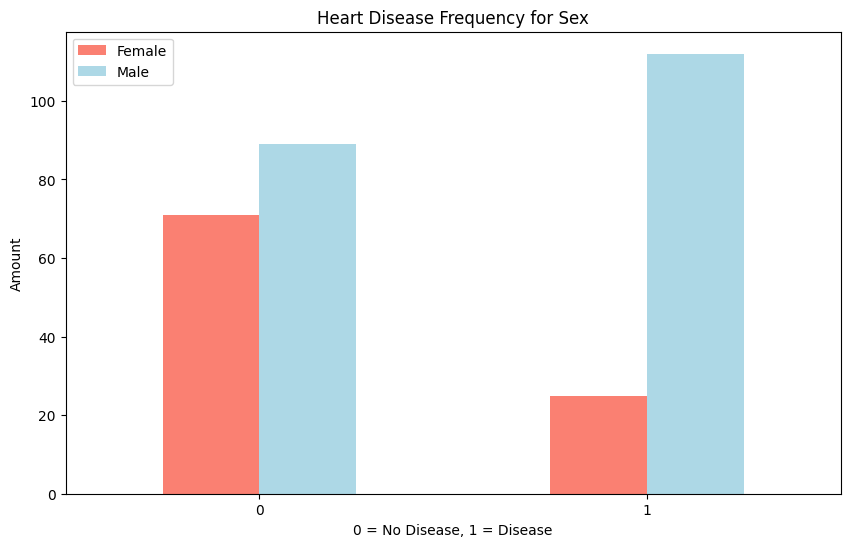

In [16]:
pd.crosstab(df.condition,df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon","lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

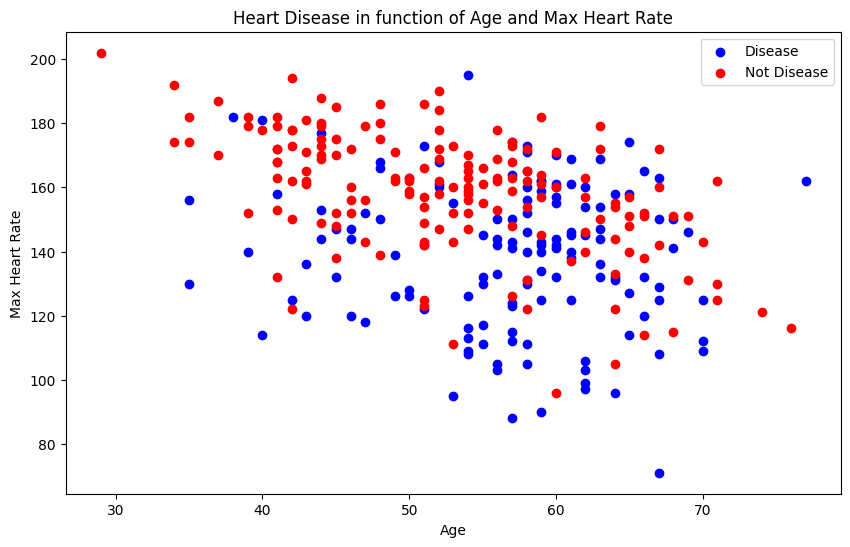

In [17]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.condition==1],
           df.thalach[df.condition==1],
           c="blue")
plt.scatter(df.age[df.condition==0],
           df.thalach[df.condition==0],
           c="red")

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","Not Disease"]);

Text(0.5, 0, 'Age')

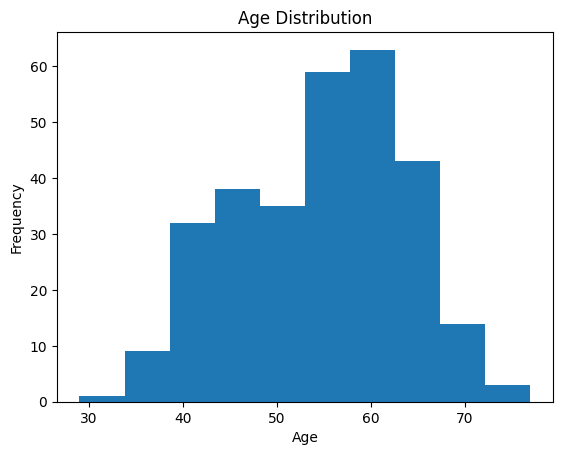

In [18]:
df.age.plot.hist()
plt.title("Age Distribution")
plt.xlabel("Age")

In [19]:
pd.crosstab(df.cp,df.condition)

condition,0,1
cp,,
0,16,7
1,40,9
2,65,18
3,39,103


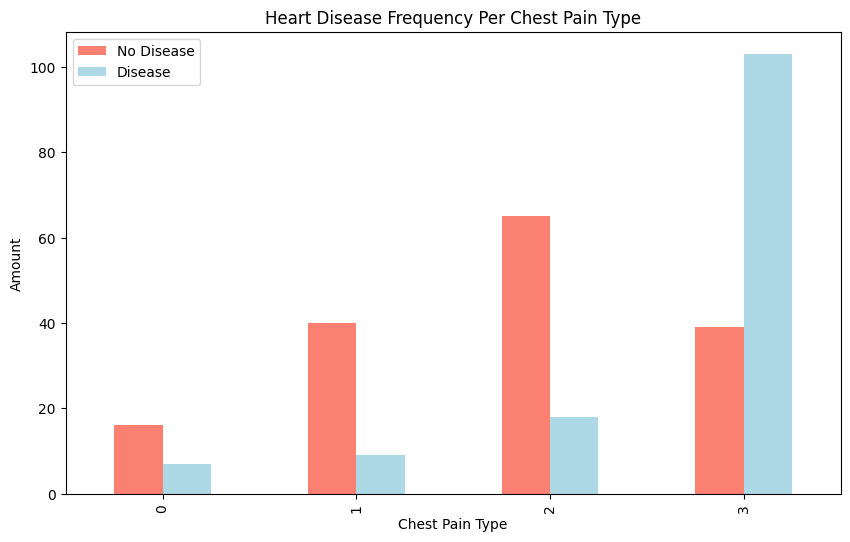

In [20]:
pd.crosstab(df.cp,df.condition).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightblue"])
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])

In [21]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.120795,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.370556,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.266275,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.130612,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.023441,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.051038,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.013612,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.258386,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.323268,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.336809,0.424052


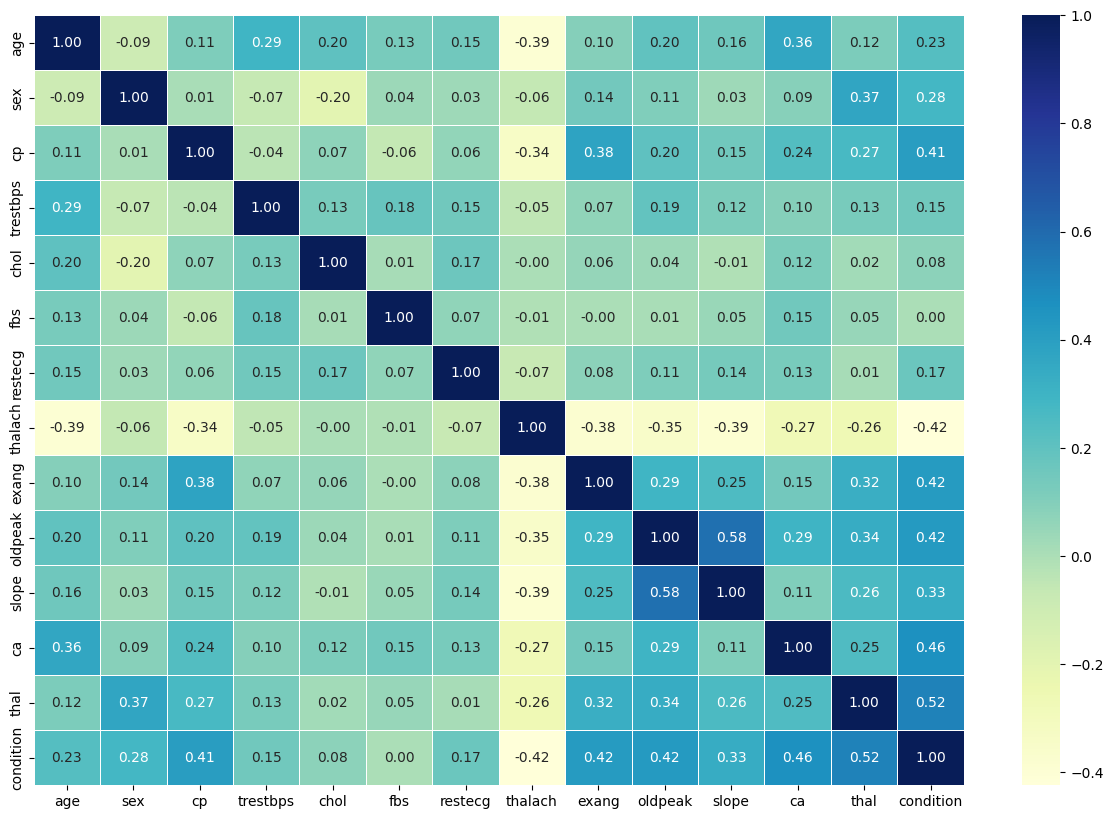

In [22]:
correlation_matrix= df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax= sns.heatmap(correlation_matrix,
               annot=True,
               linewidth=0.5,
               fmt=".2f",
               cmap="YlGnBu");

In [23]:
X= df.drop("condition",axis=1)

y= df["condition"]


In [24]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0


In [25]:
y

0      0
1      0
2      0
3      1
4      0
      ..
292    1
293    1
294    1
295    0
296    1
Name: condition, Length: 297, dtype: int64

In [26]:
np.random.seed(42)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [27]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
273,46,1,3,140,311,0,0,120,1,1.8,1,2,2
259,51,0,3,130,305,0,0,142,1,1.2,1,0,2
30,59,1,1,140,221,0,0,164,1,0.0,0,0,0
22,34,1,0,118,182,0,2,174,0,0.0,0,0,0
277,45,1,3,142,309,0,2,147,1,0.0,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,62,0,3,140,394,0,2,157,0,1.2,1,0,0
71,29,1,1,130,204,0,2,202,0,0.0,0,0,0
106,56,1,2,130,256,1,2,142,1,0.6,1,1,1
270,47,1,3,110,275,0,2,118,1,1.0,1,1,0


In [28]:
y_train

273    1
259    1
30     0
22     0
277    1
      ..
188    0
71     0
106    1
270    1
102    0
Name: condition, Length: 237, dtype: int64

In [43]:
models= {"Logistic Regression": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test,y_train,y_test):
    """
    Fits and Evaluates given machine learning models.
    mdels: a dictionay of different Scikit_learn Machine Learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels

    """
    np.random.seed(42)

    model_scores= {}

    for name, model in models.items():

        model.fit(X_train,y_train)

        model_scores[name] = model.score(X_test, y_test)

    return model_scores

In [44]:
model_scores= fit_and_score(models=models,
                         X_train=X_train,
                         X_test=X_test,
                         y_train=y_train,
                         y_test=y_test)
model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7333333333333333,
 'KNN': 0.5666666666666667,
 'Random Forest': 0.7}

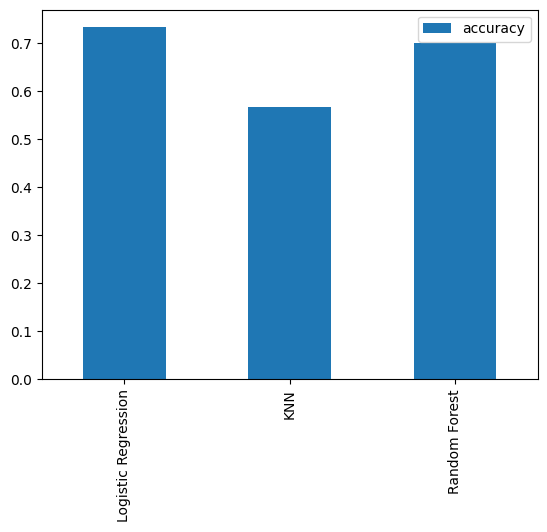

In [45]:
model_compare = pd.DataFrame( model_scores, index=["accuracy"])
model_compare.T.plot.bar();


In [46]:
train_scores=[]
test_scores=[]

neighbors= range(1,21)

knn =KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)

    knn.fit(X_train, y_train)

    train_scores.append(knn.score(X_train,y_train))

    test_scores.append(knn.score(X_test,y_test))

In [47]:
train_scores

[1.0,
 0.7974683544303798,
 0.8016877637130801,
 0.7890295358649789,
 0.7763713080168776,
 0.7679324894514767,
 0.7679324894514767,
 0.7637130801687764,
 0.7383966244725738,
 0.7257383966244726,
 0.7257383966244726,
 0.7257383966244726,
 0.7257383966244726,
 0.729957805907173,
 0.7383966244725738,
 0.7215189873417721,
 0.7383966244725738,
 0.7426160337552743,
 0.7552742616033755,
 0.7510548523206751]

In [48]:
test_scores

[0.5166666666666667,
 0.5333333333333333,
 0.48333333333333334,
 0.5333333333333333,
 0.5666666666666667,
 0.55,
 0.55,
 0.5166666666666667,
 0.5833333333333334,
 0.5666666666666667,
 0.6166666666666667,
 0.6,
 0.5833333333333334,
 0.5833333333333334,
 0.6166666666666667,
 0.6166666666666667,
 0.6166666666666667,
 0.6,
 0.6,
 0.6]

Maximum KNN score on the test data: 61.67%


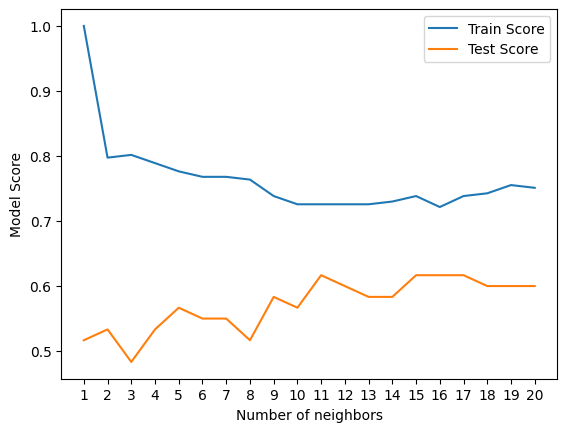

In [49]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")


In [50]:
log_reg_grid={"C": np.logspace(-4,4,20),
             "solver":["liblinear"]}

random_re_grid={"n_estimators": np.arange(10,1000,50),
               "max_depth" :[None,3,5,10],
               "min_samples_split":np.arange(2,20,2),
               "min_samples_leaf": np.arange(1,20,2)}


In [51]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions= log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [52]:
rs_log_reg.best_estimator_

LogisticRegression(C=0.08858667904100823, solver='liblinear')

In [54]:
rs_log_reg.score(X_test,y_test)

0.7333333333333333

In [55]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=random_re_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [56]:
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 5}

In [57]:
rs_rf.score(X_test,y_test)

0.7333333333333333

In [58]:
log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver": ["liblinear"]}

gs_log_reg= GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        verbose=True)

gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [59]:
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [60]:
gs_log_reg.score(X_test,y_test)

0.7333333333333333

In [61]:
y_preds = gs_log_reg.predict(X_test)

In [62]:
y_preds

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0])

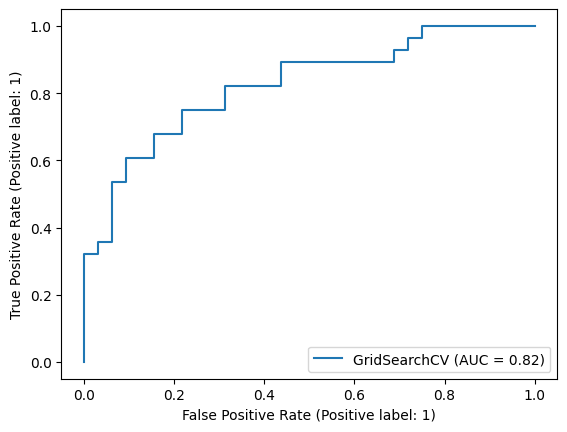

In [63]:
 from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

In [64]:
print(confusion_matrix(y_test, y_preds))

[[23  9]
 [ 7 21]]


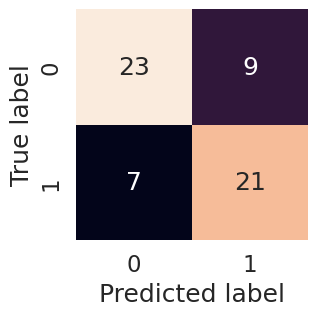

In [65]:
import seaborn as sns
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

plot_conf_mat(y_test, y_preds)

In [66]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



In [67]:
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [68]:
clf=LogisticRegression(C=0.20433597178569418,
                      solver="liblinear")


In [69]:
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc

array([0.66666667, 0.88333333, 0.81355932, 0.93220339, 0.84745763])

In [70]:
cv_acc= np.mean(cv_acc)
cv_acc

0.8286440677966102

In [71]:
cv_pre = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="precision")
cv_pre

array([1.        , 0.92      , 0.76666667, 0.87096774, 0.84615385])

In [72]:
cv_pre= np.mean(cv_pre)
cv_pre

0.8807576509511993

In [73]:
cv_re = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="recall")
cv_re

array([0.28571429, 0.82142857, 0.85185185, 1.        , 0.81481481])

In [74]:
cv_re= np.mean(cv_re)
cv_re

0.7547619047619047

In [75]:
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="f1")
cv_f1

array([0.44444444, 0.86792453, 0.80701754, 0.93103448, 0.83018868])

In [76]:
cv_f1= np.mean(cv_f1)
cv_f1

0.7761219357219767

<Axes: title={'center': 'Cross-validated Classification metrics'}>

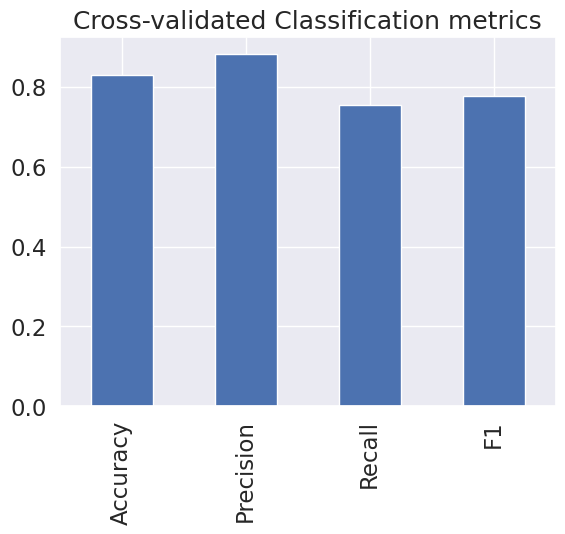

In [77]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_pre,
                          "Recall": cv_re,
                          "F1": cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title="Cross-validated Classification metrics",
                     legend = False )

In [78]:
clf=LogisticRegression(C=0.20433597178569418,
                      solver="liblinear")
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [79]:
clf.coef_

array([[-0.02413903,  0.83802339,  0.29494936,  0.02092897,  0.00419436,
        -0.27530411,  0.26739054, -0.03883295,  0.37806397,  0.44475864,
         0.16442336,  0.9047174 ,  0.76318573]])

In [80]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': -0.02413903087673944,
 'sex': 0.8380233854124407,
 'cp': 0.29494935667262173,
 'trestbps': 0.020928966721969436,
 'chol': 0.004194364778425377,
 'fbs': -0.2753041066152157,
 'restecg': 0.26739053613646396,
 'thalach': -0.03883294825438401,
 'exang': 0.37806397006745435,
 'oldpeak': 0.44475863953148226,
 'slope': 0.16442336477226102,
 'ca': 0.9047173965077311,
 'thal': 0.7631857256158004}

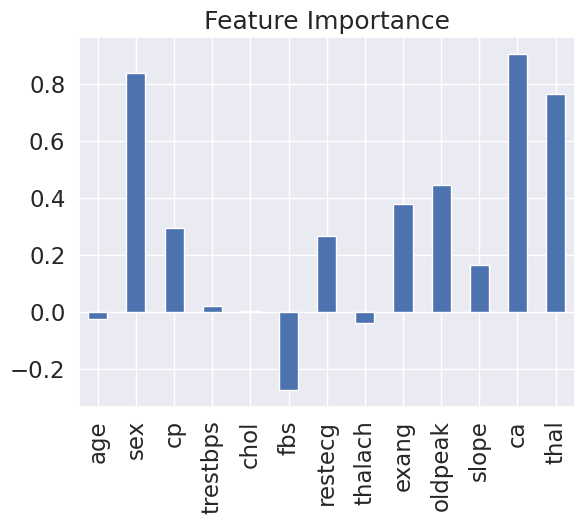

In [81]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [82]:
import pickle

pickle.dump(gs_log_reg,open("gs_logistic_reg_heart_disease_model.pkl","wb"))